<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#AI-1---Assignment-2" data-toc-modified-id="AI-1---Assignment-2-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>AI 1 - Assignment 2</a></span><ul class="toc-item"><li><span><a href="#How-to-submit" data-toc-modified-id="How-to-submit-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>How to submit</a></span></li><li><span><a href="#Installation" data-toc-modified-id="Installation-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Installation</a></span></li><li><span><a href="#Part-1---understand-a-model" data-toc-modified-id="Part-1---understand-a-model-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Part 1 - understand a model</a></span><ul class="toc-item"><li><span><a href="#Optimizers" data-toc-modified-id="Optimizers-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Optimizers</a></span><ul class="toc-item"><li><span><a href="#Mini-overview-over-popular-optimizers" data-toc-modified-id="Mini-overview-over-popular-optimizers-1.3.1.1"><span class="toc-item-num">1.3.1.1&nbsp;&nbsp;</span>Mini-overview over popular optimizers</a></span></li></ul></li><li><span><a href="#Question-1" data-toc-modified-id="Question-1-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Question 1</a></span></li><li><span><a href="#Question-2" data-toc-modified-id="Question-2-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Question 2</a></span></li></ul></li><li><span><a href="#Part-2---train-a-model" data-toc-modified-id="Part-2---train-a-model-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Part 2 - train a model</a></span><ul class="toc-item"><li><span><a href="#Question-3" data-toc-modified-id="Question-3-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Question 3</a></span><ul class="toc-item"><li><span><a href="#Vizualize-the-training" data-toc-modified-id="Vizualize-the-training-1.4.1.1"><span class="toc-item-num">1.4.1.1&nbsp;&nbsp;</span>Vizualize the training</a></span></li><li><span><a href="#Choose-3-optimizers-and-the-best-hyper-parameters-for-each." data-toc-modified-id="Choose-3-optimizers-and-the-best-hyper-parameters-for-each.-1.4.1.2"><span class="toc-item-num">1.4.1.2&nbsp;&nbsp;</span>Choose 3 optimizers and the best hyper-parameters for each.</a></span></li><li><span><a href="#Dropout" data-toc-modified-id="Dropout-1.4.1.3"><span class="toc-item-num">1.4.1.3&nbsp;&nbsp;</span>Dropout</a></span></li></ul></li></ul></li></ul></li></ul></div>

# AI 1 - Assignment 2

This assignment requires you to install [Keras](https://keras.io/) and [Tensorflow](https://www.tensorflow.org). Keras is a high-level Deep Learning API, written in Python using TensorFlow, CNTK, or Theano as back-ends. Here, we will use Tensorflow as back-end.

This assignment is divided in two parts. In the first part you will learn about Keras with the help of the example below and the Keras [documentation](https://keras.io/). In the second part, you will practise training a Deep Learning model.

## How to submit
Submit by uploading this notebook to Canvas. It should include **plots**, **results** and **code** showing how the results were genereated.  Remember to name your file(s) appropriately.
**Deadline** is on 17:30 on November 14, 2019.

## Installation
Instructions can be found here:
* [Keras](https://keras.io)
* [Tensorflow](https://www.tensorflow.org/install/)

Since Tensorflow 2.0, Keras is included in Tensorflow and will be automatically installed with Tensorflow. It can be accessed as ```tensorflow.keras```

I recommend using ```pip```. For Tensorflow is it sufficient to install the CPU version. The GPU version requires a good workstation with high-end Nvidia GPU(s), and it is not necessary for this tutorial.

If you're using a virtualenv:
```
pip3 install tensorflow
```
Add ```sudo``` for a systemwide installation (i.e. no ```virtualenv```).
```
sudo pip3 install tensorflow
```
Make sure that you have ```sklearn```, ```matplotlib``` and ```numpy``` installed, too.

## Part 1 - understand a model

### Optimizers

Loss is the penalty for a bad prediction. That is, loss is a number indicating how bad the model's prediction was on a single example. If the model's prediction is perfect, the loss is zero; otherwise, the loss is greater than zero. The goal of training a model is to find a set of weights and biases (i.e. parameters) that have, on average, a low loss across all examples. The term cost is used interchangably with loss. See the [loss section](https://keras.io/losses/) in the Keras documentation for a list and descriptions of what is available.

<img src="./fig/LossSideBySide.png" width="500">
<figcaption>Figure. Left: high loss and right: low loss.</figcaption>

The optimizer is the algorithm used to minimize the loss/cost. Optimizers in neural networks work by finding the gradient/derivative of the loss with respect to the parameters (i.e. the weights). "Gradient" is the correct term since a we are looking at multi-dimensional systems (i.e. many parameters), however, the terms are often used interchangably. For those who didn't take multivariate calculus, just think of the gradient as a derivative. The derivative of the loss with respect to a parameters tells us how much the loss changes when we nudge a weight up or down. So, by knowing how a given parameter affects the loss the optimizer can change it so as to decrease the loss. The various optimizers differ in how they change the weights. 

#### Mini-overview over popular optimizers

* **Stochastic Gradient Descent (SGD)**. This is the most basic and easy to understand optimizer. It updates the weights in the negative direction of the gradient by taking the average gradient of mini-batch of data (e.g. 20-50 exemplars) in each step. Vanilla SGD only has one hyper-parameter, the learning rate.
* **Momentum**. This optimizer "gains speed" when the gradient has pointed in the same direction for several consecutive updates. That is, it gains momentum. It does this by accumulating an exponentially decaying moving average of past gradients. The step size depends on how large and aligned the sequence of gradients are. The most important hyper-parameter is alpha and common values are 0.5 and 0.9.
* **Nesterov Momentum**. This is a modification of the standard momentum optimizer.
* **AdaGrad**. This optimizer Ada-ptively sets the learning rate depending on the steepness/magnitude of the Grad-ients. This is done so that weights with big gradients get a smaller effective learning rate, and weights with small gradients will get a greater effective learning rate. The result is quicker progress in the more gently sloped directions of the weight space and a slowdown in stepp regions.
* **RMSProp**. This is modification of AdaGrad, where the accumulated gradient decays, that is, the influence of previous gradients gradually decreases.
* **Adam**. The name comes from "adaptive moments", and it is a combination of RMSProp and momentum. It has several hyper-parameters.

The above list just gives a quick overview of some of the most common. However, old optimizers are constantly improved and new are developed. SGD and momentum are most basic and easiest to understand and implement. They are still in use, but the more advanced optimizers tend to be better for practical use. Which one to use is generally an emperical question depending on both the data and the model.

For a more complete overview of optimization algorithms see [this comparison](http://ruder.io/optimizing-gradient-descent/), and to see what is available in Keras, see the [optimizer section](https://keras.io/optimizers/) of the documentation.

See the images below for a comparison of optimizers in a 2D space (NAG: Nesterov accelerated gradient, Adadelta: an extension of AdaGrad).

<img src="./fig/contours_evaluation_optimizers.gif" width="500">
<img src="./fig/saddle_point_evaluation_optimizers.gif" width="500">

In [2]:
from platform import python_version
print(python_version())

3.7.5


In [4]:
import tensorflow as tf
print (tf.__version__)
# tf.compat.v1.disable_v2_behavior()

2.0.0-beta0


In [5]:
# imports
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# for the random seed
import tensorflow as tf

# set the random seeds to get reproducible results
np.random.seed(1)
# tf.set_random_seed(2) # 1.14.0
tf.random.set_seed(2) # 2.0.0

# Load data from https://www.openml.org/d/554 (785 features)
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X, y = X[:1000], y[:1000]
X = X.reshape(X.shape[0], 28, 28, 1)
# Normalize
X = X / 255.

# number of unique classes
num_classes = len(np.unique(y)) # = 10
y = y.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

num_tot = y.shape[0] # = 1000
num_train = y_train.shape[0]
num_test = y_test.shape[0]

y_oh = np.zeros((num_tot, num_classes))
y_oh[range(num_tot), y] = 1

y_oh_train = np.zeros((num_train, num_classes))
y_oh_train[range(num_train), y_train] = 1

y_oh_test = np.zeros((num_test, num_classes))
y_oh_test[range(num_test), y_test] = 1

### Question 1
**The data set**

Plot a three examples from the data set.
* What type of data are in the data set?

    $X$ is numeric. It represents the pixels as input variables. The 784 values in each row of $X$ can be rearranged to a $28 \times 28$ array to reveal an image consisted of $28 \times 28$ pixels that can best represent the corresponding $y$.\
    $y$ is nominal/categorical as the response variable. There are 10 categories from 0 to 9.\
    
    

* What does the line ```X = X.reshape(X.shape[0], 28, 28, 1)``` do?
    
    It sets $X$ to a 4-dimension array.\
    X.shape[0] is equal to 1,000 from the total of 1,000 samples from the splitting before.\
    $28 \times 28$ is equal to 784, representing the 784 input variables (pixels).\
    The last "1" is each of the values in the original dataset.\

Look at how the encoding of the targets (i.e. ```y```) is changed. E.g. the lines
```
    y_oh = np.zeros((num_tot, num_classes))
    y_oh[range(num_tot), y] = 1
```
Print out a few rows of ```y``` next to ```y_oh```. (shown in the next cell below)
* What is the relationship between ```y``` and ```y_oh```?

    num_tot is 1000, num_classes is 10.\
    $y$ is a $1000 \times 1$ array with the original categorical classifications from 0 to 9 (nominal, not ordinal).\
    $y\_oh$ is a $1000 \times 10 $ array with originally all zeros and one "1" value in each row, representing the class of output $y$ of that data point.
    
    
* What is the type of encoding in ```y_oh``` called and why is it used?

    One-hot encoding.\
    Because the targets are in categorical format, not ordered values. \
    We have 10 classes, the target for each is a 10-dimensional vector that is all zeros. Then we assign '1' at the index corresponding to the class of the sample. It's the same as the concept of dummy variable.
    
    
* Plot three data examples in the same figure and set the correct label as title. (shown in the cells below)
    * It should be possible to see what the data represent.

In [7]:
# Print out a few rows of y next to y_oh
print(y[:6], y_oh[:6])

[5 0 4 1 9 2] [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


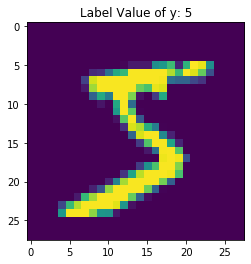

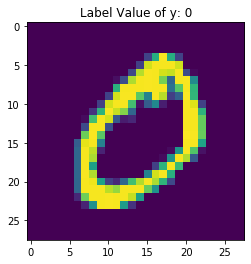

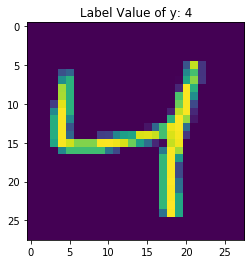

In [21]:
# Plot three data examples
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

for i in range(0, 3):
    X0 = X[i]
    X0 = X0.reshape(28, 28)
    y0 = str(y[i])
    plt.imshow(X0)
    plt.title('Label Value of y:' + ' ' + y0)
    plt.show()

### Question 2
**The model**

Below is some code for bulding and training a model with Keras.
* What type of network is implemented below? I.e. a normal MLP, RNN, CNN, Logistic Regression...?

    CNN
    
    
* What does ```Dropout()``` do?

    Dropout() consists in randomly setting a fraction rate of input units to 0 at each update during training time.\
    With the Dropout() the training performance gets worse, but the testing performance gets improved. It helps the network prevent overfitting.


* Which type of activation function is used for the hidden layers?

    ReLU: $f(x) = max(0, x)$


* Which type of activation function is used for the output layer?

    Softmax: $\sigma (z)_j = \frac{e^{z_j}}{\sum^{K}_{k=1} e^{z_k}}$ for $j = 1, ..., K$.


* Why are two different activation functions used?

    The computing process of ReLU is relatively simple to save time. Also during backpropagations as using, e.g. Sigmoid function, in the hidden layers as the depth increases, it could be easy to have vanishing gradient problems.\
    For the output layer, we use Softmax as for the multiple classification problem. It outputs multiple results for each single data example. It is not like Sigmiod function, a binary one of outputting 1 or 0. Softmax function compresses each class in the range of 0 to 1, and allows the output results to represent the probabilties of each specific class. Then, the most likely class is the one with the highest probability output.


* What optimizer is used in the model below?

    SGD - stochastic gradient descent


* How often are the weights updated (i.e. after how many data examples)?

   Updated after each 32 data examples (batch size).


* What loss function is used?

    categorical_crossentropy\
    The targets are in categorical format. Here we have 10 classes, the target for each should be a 10-dimensional vector that is all-zeros except for a 1 at the index corresponding to the class of the sample.


* How many parameters (i.e. weights and biases, NOT hyper-parameters) does the model have?

    Based on model.summary(), there are 108,618 parameters in the model.\
    In the first hidden layer, $16 \times (3 \times 3 + 1) = 160$.\
    In the second hidden layer, $32 \times (3 \times 3 \times 16 +1)=4640$.\
    In the first fully connected layer, $(800+1) \times 128 = 102528$. 800 comes from $32 \times 5 \times 5$\
    In the second fully connected layer, $(128+1) \times 10 = 1290$.\
    The total is 108,618 parameters.


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD

model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.))

model.add(Conv2D(32, (3, 3), activation='relu'))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.))
# keras.layers.Dropout(rate, noise_shape=None, seed=None)

model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=sgd) # metrics='acc'

# Train the model
model.fit(X_train, y_oh_train, batch_size=32, epochs=60)

# Evaluate performance
test_loss = model.evaluate(X_test, y_oh_test, batch_size=32)

predictions = model.predict(X_test, batch_size=32)
predictions = np.argmax(predictions, axis=1)  # change encoding again
print('Accuracy:', (predictions == y_test).sum() / predictions.shape[0])

model.summary()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 800 samples
Epoch 1/60
800/800 [==============================] - 1s 1ms/sample - loss: 2.1384
Epoch 2/60
800/800 [==============================] - 1s 979us/sample - loss: 1.0354
Epoch 3/60
800/800 [==============================] - 1s 833us/sample - loss: 0.5230
Epoch 4/60
800/800 [==============================] - 1s 859us/sample - loss: 0.3438
Epoch 5/60
800/800 [==============================] - 1s 728us/sample - loss: 0.2431
Epoch 6/60
800/800 [==============================] - 1s 905us/sample - loss: 0.1992
Epoch 7/60
800/800 [==============================] - 1s 790us/sample - loss: 0.1588
Epoch 8/60
800/800 [==============================] - 1s 777us/sample - loss: 0.1100
Epoch 9/60
800/800 [==============================] - 1s 903us/sample - loss: 0.0830
Epoch 10/60
800/800 [==============================] - 1s 933us/sample - loss: 0.0707
Epoch 11/60
800/800 [===============

## Part 2 - train a model

A model's performance depends on many factors apart from the model architecture (e.g. type and number of layers) and the dataset. Here you will get to explore some of the factors that affect model performance. Much of the skill in training deep learning models lies in quickly finding good values/options for these choises.

In order to observe the learning process it is best to compare the training set loss with the loss on the test set. How to visualize these variables with Keras is described under [Training history visualization](https://keras.io/visualization/#training-history-visualization) in the documentation.

You will explore the effect of 1) optimizer, 2) training duration, and 3) dropout (see the question above).

When training, an **epoch** is one pass through the full training set.

### Question 3

* **Vizualize the training**. Use the model above to observe the training process. Train it for 150 epochs and then plot both "loss" and "val_loss" (i.e. loss on the valiadtion set, here the terms "validation set" and "test set" are used interchangably, but this is not always true). What is the optimal number of epochs for minimizing the test set loss? 
    * Remember to first reset the weights (```model.reset_states()```), otherwise the training just continues from where it was stopped earlier.
        
    \textbf{Question 3.1: Vizualize the training}:\
    For the 150 epoches using the original SGD optimizer, the minimum test loss is at position 10 with value of 0.28334192633628846.\
    The plot is shown in the cell below.\
    \
    \
* **Optimizer**. Select three different optimizers and for each find the close-to-optimal hyper-parameter(s). In your answer, include a) your three choises, b) best hyper-parameters for each of the three optimizers and, c) the code that produced the results.
    * *NOTE* that how long the training takes varies with optimizer. I.e., make sure that the model is trained for long enough to reach optimal performance.

    \textbf{Question 3.2: Three optimizers (SGD, Adamax, Adadelta)}\
    \textbf{1. SGD with 30 epochs}\
    For the SGD optimizer, I tested the learning_rate of (0.001, 0.01, 0.02, 0.1, 0.2), momentum of (0.0, 0.2, 0.4, 0.6, 0.8, 0.9).\
    The Best Accuracy is 0.94 with best learning_rate of 0.2 and best momentum of 0.6.\
    The Best test loss is 0.3072282600402832 with best learning_rate of 0.02 and best momentum of 0.4.\
    Since at learning_rate of 0.02 and momentum of 0.4 the accuracy is 0.93, quite close to the best of 0.94. I would pick this combination of hyper-parameters.\
    \textbf{learning_rate: 0.02, momentum: 0.4}\
    Accuracy: 0.93, test loss: 0.3072282600402832\
    test loss is minimized (0.30536296784877776) at the 25th epoch\

    \textbf{2. Adamax with 30 epochs}\
    For the Adamax optimizer, I tested the learning_rate of (0.001, 0.002, 0.01, 0.02, 0.1), beta_1 of (0.9, 0.95, 0.99), beta_2 of (0.9, 0.99, 0.999).\
    The Best Accuracy is 0.95 with best learning_rate of 0.002, best beta_1 of 0.95, best beta_2 of 0.9.\
    The Best test loss is 0.31444640398025514 with best learning_rate of 0.001, best beta_1 of 0.99, best beta_2 of 0.999.\
    Since at learning_rate of 0.001, beta_1 of 0.99, beta_2 of 0.999 the accuracy is 0.925, desirable. I would pick this combination of hyper-parameters.\
    \textbf{learning_rate: 0.001, beta_1: 0.99, beta_2: 0.999}\
    Accuracy: 0.925, test loss: 0.31444640398025514\
    test loss is minimized (0.29742772221565245) at the 23rd epoch\
    
    \textbf{3. Adadelta with 20 epochs}\
    For the Adadelta optimizer, I tested the learning_rate of (0.01, 0.4, 0.5, 0.6, 0.8, 1.0), rho of (0.8, 0.85, 0.9, 0.95).\
    The Best Accuracy is 0.945 with best learning_rate of 0.5 and best rho of 0.9.\
    The Best test loss is 0.2598712247610092 with best learning_rate of 0.6 and best rho of 0.85.\
    Since at learning_rate of 0.6 and rho of 0.85 the accuracy is 0.94, quite close to the best of 0.945. I would pick this combination of hyper-parameters.\
    \textbf{learning_rate: 0.6, rho: 0.85}\
    Accuracy: 0.94, test loss: 0.2598712247610092\
    test loss is minimized (0.23903204023838043) at the 17th epoch\
    
    Based on the accuracy, test loss, and optimal training duration (epochs), I would choose \textbf{Adadelta} as the optimizer.\
    \


* **Dropout**. Use the best optimizer and do hyper-parameter seach and find the best value for ```Dropout()```.

    \textbf{Question 3.3: Dropout}\
    Using Adadelta with learning rate of 0.6 and rho of 0.85, test different dropout paramaters.\
    At dropout rate of 0.0 (default), the accuracy is the best at 0.94, test loss is 0.2598712247610092.\
    At dropout rate of 0.4, the test loss is minimized at 0.23917054653167724 , the accuracy is 0.93.\
    There is not much difference in the 2 accuracy values. I would pick the one with lower test loss value.\
    So, the best value for Dropout() is 0.4.\
    \
    \

* **Best model**. Combine the what you learned from the above three questions to build the best model. How much better is it than the worst and average models?

    \textbf{Question 3.4: Best model}\
    The model is using Adadelta with learning rate of 0.6, rho of 0.85, and Dropout() of 0.4.\
    The accuracy is 0.93. The test loss is 0.23917054653167724.\
    \
    The worst accuracy is 0.925 from Adamax, the average accuracy is (0.93+0.925+0.94+0.93)/4=0.93125.\
    My best model does not have the best accuracy as I made the choice based mostly upon test loss. My model accuracy of 0.93 is slightly better than then worst one but also slightly lower than the average.\
    
    The worst test loss is 0.30536296784877776 from SGD, the average test loss is (0.305+0.297+0.239+0.239)/4=0.270.\
    My best model has a much better test loss than the worst and average values.\
    \


* **Results on the test set**. When doing this search for good model configuration/hyper-parameter values, the data set was split into *two* parts: a training set and a test set (the term "validation" was used interchangably wiht "test"). For your final model, is the performance (i.e. accuracy) on the test set representative for the performance one would expect on a previously unseen data set (drawn from the same distribution)? Why?

    Yes. From the plotted figures, the curves of train loss and test loss fit did not diverge too much away from each other (in the larger scale), which means the model is not overfitting on the training set. Also, I applied the Dropout() rate of 0.4 in the best model to help the network prevent overfitting. The model now performs better for test sets, and thus for the unseen data set. The model fits the test set quite well.

**HINT**: For ideas about hyper-parameter tuning, take a look at the strategies described in the sklearn documentation under [model selection](https://scikit-learn.org/stable/model_selection.html)


**Good luck!**

#### Vizualize the training

200/200 [==============================] - 0s 244us/sample - loss: 0.4539
Accuracy: 0.92


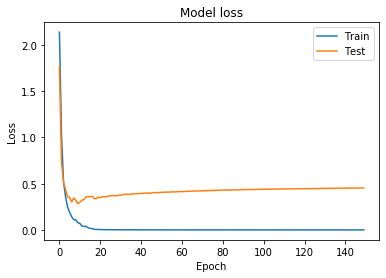

The minimum is at position 10
The minimum test loss value is 0.28334192633628846


In [7]:
# SGD - 150 epochs

np.random.seed(1)
tf.random.set_seed(2)

model.reset_states()
model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.))

model.add(Conv2D(32, (3, 3), activation='relu'))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.))

model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=sgd)

# Train the model
history = model.fit(X_train, y_oh_train, batch_size=32, epochs=150, verbose=0, validation_data=(X_test, y_oh_test))

# Evaluate performance
test_loss = model.evaluate(X_test, y_oh_test, batch_size=32)

predictions = model.predict(X_test, batch_size=32)
predictions = np.argmax(predictions, axis=1) # change encoding again
print('Accuracy:', (predictions == y_test).sum() / predictions.shape[0])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

print("The minimum is at position", history.history['val_loss'].index(min(history.history['val_loss']))+1)
print("The minimum test loss value is", min(history.history['val_loss']))

#### Choose 3 optimizers and the best hyper-parameters for each.

1. SGD with 30 epochs

In [22]:
# keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False)
# learning_rate: float >= 0. Learning rate.
# momentum: float >= 0. Parameter that accelerates SGD in the relevant direction and dampens oscillations.
# nesterov: boolean. Whether to apply Nesterov momentum.
from tensorflow.keras.optimizers import SGD

temp = 0
lr_temp = 0
mtm_temp = 0
temp1 = 100
lr_temp1 = 0
mtm_temp1 = 0
learning_rate = [0.001, 0.01, 0.02, 0.1, 0.2]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]


def create_model_SGD(learning_rate, momentum):
    np.random.seed(1)
    tf.random.set_seed(2)
    model = Sequential()
    model.reset_states()
    model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.))
    model.add(Dense(10, activation='softmax'))
    optimizer = SGD(lr=learning_rate, decay=1e-6,
                    momentum=momentum, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer)
    return model


i = 0
for lr in learning_rate:
    for mtm in momentum:
        model_SGD = create_model_SGD(lr, mtm)
        model_SGD.fit(X_train, y_oh_train, batch_size=32,
                      epochs=30, verbose=0, validation_data=(X_test, y_oh_test))
        #tested with 50 epochs at first, the 25th gave the best - use 30 now
        test_loss = model_SGD.evaluate(
            X_test, y_oh_test, batch_size=32, verbose=0)
        predictions = model_SGD.predict(X_test, batch_size=32)
        predictions = np.argmax(predictions, axis=1)
        result = (predictions == y_test).sum() / predictions.shape[0]
        i += 1
        print('Test'+' '+str(i))
        print('learning_rate:'+str(lr), 'momentum:'+str(mtm))
        print('Accuracy:'+str(result), 'Test_loss:'+str(test_loss))
        print()

        if result > temp:
            temp = result
            lr_temp = lr
            mtm_temp = mtm
        if test_loss < temp1:
            temp1 = test_loss
            lr_temp1 = lr
            mtm_temp1 = mtm

print('Best Accuracy: '+str(temp), 'Best learning_rate: ' +
      str(lr_temp), 'Best momentum: '+str(mtm_temp))
print('Best Test Loss: '+str(temp1), 'Best learning_rate: ' +
      str(lr_temp1), 'Best momentum: '+str(mtm_temp1))

Test 1
learning_rate:0.001 momentum:0.0
Accuracy:0.585 Test_loss:1.7755356884002687

Test 2
learning_rate:0.001 momentum:0.2
Accuracy:0.685 Test_loss:1.3813754177093507

Test 3
learning_rate:0.001 momentum:0.4
Accuracy:0.775 Test_loss:0.8772118473052979

Test 4
learning_rate:0.001 momentum:0.6
Accuracy:0.86 Test_loss:0.5732302403450013

Test 5
learning_rate:0.001 momentum:0.8
Accuracy:0.875 Test_loss:0.4246595811843872

Test 6
learning_rate:0.001 momentum:0.9
Accuracy:0.895 Test_loss:0.39629786252975463

Test 7
learning_rate:0.01 momentum:0.0
Accuracy:0.905 Test_loss:0.35427225708961485

Test 8
learning_rate:0.01 momentum:0.2
Accuracy:0.91 Test_loss:0.3542452692985535

Test 9
learning_rate:0.01 momentum:0.4
Accuracy:0.91 Test_loss:0.3726147997379303

Test 10
learning_rate:0.01 momentum:0.6
Accuracy:0.92 Test_loss:0.3983390420675278

Test 11
learning_rate:0.01 momentum:0.8
Accuracy:0.925 Test_loss:0.39042583107948303

Test 12
learning_rate:0.01 momentum:0.9
Accuracy:0.92 Test_loss:0.405

For the SGD optimizer, I tested the learning_rate of (0.001, 0.01, 0.02, 0.1, 0.2), momentum of (0.0, 0.2, 0.4, 0.6, 0.8, 0.9).\
The Best Accuracy is 0.94 with best learning_rate of 0.2 and best momentum of 0.6.\
The Best test loss is 0.3072282600402832 with best learning_rate of 0.02 and best momentum of 0.4.\
Since at \textbf{learning_rate of 0.02 and momentum of 0.4} the accuracy is 0.93, quite close to the best of 0.94. I would pick this combination of hyper-parameters.\
\
Accuracy: 0.93, test loss: 0.3072282600402832\
learning_rate: 0.02, momentum: 0.4\

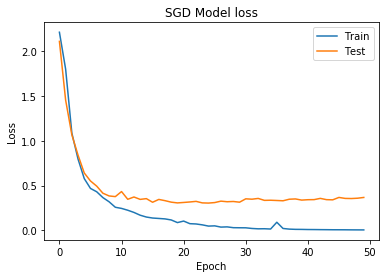

The minimum is at position 25
The minimum test loss value is 0.30536296784877776


In [24]:
model_SGD_best = create_model_SGD(0.02,0.4)
history_SGD = model_SGD_best.fit(X_train, y_oh_train, batch_size=32,
                      epochs=50, verbose=0, validation_data=(X_test, y_oh_test))
plt.plot(history_SGD.history['loss'])
plt.plot(history_SGD.history['val_loss'])
plt.title('SGD Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

print("The minimum is at position", history_SGD.history['val_loss'].index(min(history_SGD.history['val_loss']))+1)
print("The minimum test loss value is", min(history_SGD.history['val_loss']))

2. Adamax with 30 epochs

In [29]:
# keras.optimizers.Adamax(learning_rate=0.002, beta_1=0.9, beta_2=0.999)
# learning_rate: float >= 0. Learning rate.
# beta_1: float, 0 < beta < 1. Generally close to 1.
# beta_2: float, 0 < beta < 1. Generally close to 1.
from tensorflow.keras.optimizers import Adamax

temp = 0
lr_temp = 0
b1_temp = 0
b2_temp = 0
temp1 = 100
lr_temp1 = 0
b1_temp1 = 0
b2_temp1 = 0
learning_rate = [0.001, 0.002, 0.01, 0.02, 0.1]
beta_1 = [0.9, 0.95, 0.99]
beta_2 = [0.9, 0.99, 0.999]


def create_model_Adamax(learning_rate, beta_1, beta_2):
    np.random.seed(1)
    tf.random.set_seed(2)
    model = Sequential()
    model.reset_states()
    model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.))
    model.add(Dense(10, activation='softmax'))
    optimizer = Adamax(learning_rate=learning_rate, beta_1=beta_1, beta_2=beta_2)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer)
    return model


i = 0
for lr in learning_rate:
    for b1 in beta_1:
        for b2 in beta_2:
            model_Adamax = create_model_Adamax(lr, b1, b2)
            model_Adamax.fit(X_train, y_oh_train, batch_size=32,
                          epochs=30, verbose=0, validation_data=(X_test, y_oh_test))
            test_loss = model_Adamax.evaluate(
                X_test, y_oh_test, batch_size=32, verbose=0)
            predictions = model_Adamax.predict(X_test, batch_size=32)
            predictions = np.argmax(predictions, axis=1)
            result = (predictions == y_test).sum() / predictions.shape[0]
            i += 1
            print('Test'+' '+str(i))
            print('learning_rate:'+str(lr), 'beta_1:'+str(b1), 'beta_2:'+str(b2))
            print('Accuracy:'+str(result), 'Test_loss:'+str(test_loss))
            print()

            if result > temp:
                temp = result
                lr_temp = lr
                b1_temp = b1
                b2_temp = b2
            if test_loss < temp1:
                temp1 = test_loss
                lr_temp1 = lr
                b1_temp1 = b1
                b2_temp1 = b2

print('Best Accuracy: '+str(temp), 'Best learning_rate: ' +
      str(lr_temp), 'Best beta_1: '+str(b1_temp), 'Best beta_2: '+str(b2_temp))
print('Best Test Loss: '+str(temp1), 'Best learning_rate: ' +
      str(lr_temp1), 'Best beta_1: '+str(b1_temp1), 'Best beta_2: '+str(b2_temp1))

Test 1
learning_rate:0.001 beta_1:0.9 beta_2:0.9
Accuracy:0.93 Test_loss:0.4006949520111084

Test 2
learning_rate:0.001 beta_1:0.9 beta_2:0.99
Accuracy:0.93 Test_loss:0.3530887103080749

Test 3
learning_rate:0.001 beta_1:0.9 beta_2:0.999
Accuracy:0.925 Test_loss:0.3177369463443756

Test 4
learning_rate:0.001 beta_1:0.95 beta_2:0.9
Accuracy:0.92 Test_loss:0.5047642719745636

Test 5
learning_rate:0.001 beta_1:0.95 beta_2:0.99
Accuracy:0.905 Test_loss:0.42124701023101807

Test 6
learning_rate:0.001 beta_1:0.95 beta_2:0.999
Accuracy:0.92 Test_loss:0.3410091137886047

Test 7
learning_rate:0.001 beta_1:0.99 beta_2:0.9
Accuracy:0.115 Test_loss:14.26451416015625

Test 8
learning_rate:0.001 beta_1:0.99 beta_2:0.99
Accuracy:0.93 Test_loss:0.40059963703155516

Test 9
learning_rate:0.001 beta_1:0.99 beta_2:0.999
Accuracy:0.925 Test_loss:0.31444640398025514

Test 10
learning_rate:0.002 beta_1:0.9 beta_2:0.9
Accuracy:0.94 Test_loss:0.5391079711914063

Test 11
learning_rate:0.002 beta_1:0.9 beta_2:0.

For the Adamax optimizer, I tested the learning_rate of (0.001, 0.002, 0.01, 0.02, 0.1), beta_1 of (0.9, 0.95, 0.99), beta_2 of (0.9, 0.99, 0.999).\
The Best Accuracy is 0.95 with best learning_rate of 0.002, best beta_1 of 0.95, best beta_2 of 0.9.\
The Best test loss is 0.31444640398025514 with best learning_rate of 0.001, best beta_1 of 0.99, best beta_2 of 0.999.\
Since at \textbf{learning_rate of 0.001, beta_1 of 0.99, beta_2 of 0.999} the accuracy is 0.925, desirable. I would pick this combination of hyper-parameters.\
\
Accuracy: 0.925, test loss: 0.31444640398025514\
learning_rate: 0.001, beta_1: 0.99, beta_2: 0.999\

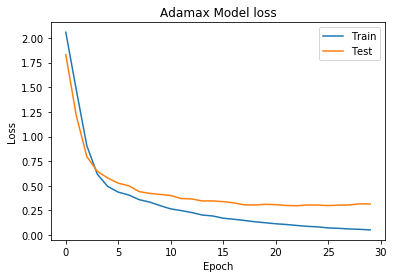

The minimum is at position 23
The minimum test loss value is 0.29742772221565245


In [38]:
model_Adamax_best = create_model_Adamax(0.001, 0.99, 0.999)
history_Adamax = model_Adamax_best.fit(X_train, y_oh_train, batch_size=32,
                      epochs=30, verbose=0, validation_data=(X_test, y_oh_test))
plt.plot(history_Adamax.history['loss'])
plt.plot(history_Adamax.history['val_loss'])
plt.title('Adamax Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

print("The minimum is at position", history_Adamax.history['val_loss'].index(min(history_Adamax.history['val_loss']))+1)
print("The minimum test loss value is", min(history_Adamax.history['val_loss']))

3. Adadelta with 20 epochs

In [10]:
# keras.optimizers.Adadelta(learning_rate=1.0, rho=0.95)
# learning_rate: float >= 0. Initial learning rate, defaults to 1. It is recommended to leave it at the default value.
# rho: float >= 0. Adadelta decay factor, corresponding to fraction of gradient to keep at each time step.
from tensorflow.keras.optimizers import Adadelta

temp = 0
lr_temp = 0
rho_temp = 0
temp1 = 100
lr_temp1 = 0
rho_temp1 = 0
learning_rate = [0.01, 0.4, 0.5, 0.6, 0.8, 1.0]
rho = [0.8, 0.85, 0.9, 0.95]


def create_model_Adadelta(learning_rate, rho):
    np.random.seed(1)
    tf.random.set_seed(2)
    model = Sequential()
    model.reset_states()
    model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.))
    model.add(Dense(10, activation='softmax'))
    optimizer = Adadelta(learning_rate=learning_rate, rho=rho)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer)
    return model


i = 0
for lr in learning_rate:
    for r in rho:
        model_Adadelta = create_model_Adadelta(lr, r)
        model_Adadelta.fit(X_train, y_oh_train, batch_size=32,
                      epochs=20, verbose=0, validation_data=(X_test, y_oh_test))
        test_loss = model_Adadelta.evaluate(
            X_test, y_oh_test, batch_size=32, verbose=0)
        predictions = model_Adadelta.predict(X_test, batch_size=32)
        predictions = np.argmax(predictions, axis=1)
        result = (predictions == y_test).sum() / predictions.shape[0]
        i += 1
        print('Test'+' '+str(i))
        print('learning_rate:'+str(lr), 'rho:'+str(r))
        print('Accuracy:'+str(result), 'Test_loss:'+str(test_loss))
        print()

        if result > temp:
            temp = result
            lr_temp = lr
            rho_temp = r

        if test_loss < temp1:
            temp1 = test_loss
            lr_temp1 = lr
            rho_temp1 = r


print('Best Accuracy: '+str(temp), 'Best learning_rate: ' +
      str(lr_temp), 'Best rho: '+str(rho_temp))
print('Best Test Loss: '+str(temp1), 'Best learning_rate: ' +
      str(lr_temp1), 'Best rho: '+str(rho_temp1))

Test 1
learning_rate:0.01 rho:0.8
Accuracy:0.355 Test_loss:2.186044235229492

Test 2
learning_rate:0.01 rho:0.85
Accuracy:0.38 Test_loss:2.172064781188965

Test 3
learning_rate:0.01 rho:0.9
Accuracy:0.41 Test_loss:2.1465829849243163

Test 4
learning_rate:0.01 rho:0.95
Accuracy:0.485 Test_loss:2.0757991027832032

Test 5
learning_rate:0.4 rho:0.8
Accuracy:0.925 Test_loss:0.2842564606666565

Test 6
learning_rate:0.4 rho:0.85
Accuracy:0.93 Test_loss:0.27635571122169494

Test 7
learning_rate:0.4 rho:0.9
Accuracy:0.94 Test_loss:0.26513707399368286

Test 8
learning_rate:0.4 rho:0.95
Accuracy:0.935 Test_loss:0.2831037950515747

Test 9
learning_rate:0.5 rho:0.8
Accuracy:0.94 Test_loss:0.2704237103462219

Test 10
learning_rate:0.5 rho:0.85
Accuracy:0.935 Test_loss:0.2637669086456299

Test 11
learning_rate:0.5 rho:0.9
Accuracy:0.945 Test_loss:0.2639917856454849

Test 12
learning_rate:0.5 rho:0.95
Accuracy:0.94 Test_loss:0.2949939000606537

Test 13
learning_rate:0.6 rho:0.8
Accuracy:0.94 Test_loss

For the Adadelta optimizer, I tested the learning_rate of (0.01, 0.4, 0.5, 0.6, 0.8, 1.0), rho of (0.8, 0.85, 0.9, 0.95).\
The Best Accuracy is 0.945 with best learning_rate of 0.5 and best rho of 0.9.\
The Best test loss is 0.2598712247610092 with best learning_rate of 0.6 and best rho of 0.85.\
Since at \textbf{learning_rate of 0.6 and rho of 0.85} the accuracy is 0.94, quite close to the best of 0.945. I would pick this combination of hyper-parameters.\
\
Accuracy: 0.94, test loss: 0.2598712247610092\
learning_rate: 0.6, rho: 0.85\

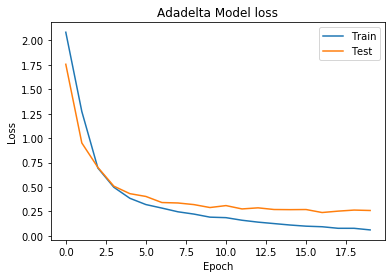

The minimum is at position 17
The minimum test loss value is 0.23903204023838043


In [32]:
model_Adadelta_best = create_model_Adadelta(0.6, 0.85)
history_Adadelta = model_Adadelta_best.fit(X_train, y_oh_train, batch_size=32,
                      epochs=20, verbose=0, validation_data=(X_test, y_oh_test))
plt.plot(history_Adadelta.history['loss'])
plt.plot(history_Adadelta.history['val_loss'])
plt.title('Adadelta Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

print("The minimum is at position", history_Adadelta.history['val_loss'].index(min(history_Adadelta.history['val_loss']))+1)
print("The minimum test loss value is", min(history_Adadelta.history['val_loss']))

#### Dropout

In [17]:
from tensorflow.keras.optimizers import Adadelta

temp = 0
drop_rate = 0
temp1 = 100
drop_rate1 = 0
i = 0
for r in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]:
    np.random.seed(1)
    tf.random.set_seed(2)
    model = Sequential()
    model.reset_states()
    model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(r)) # add dropout
    model.add(Dense(10, activation='softmax'))

    optimizer = Adadelta(learning_rate=0.6, rho=0.85)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer)
    model.fit(X_train, y_oh_train, batch_size=32, epochs=20, verbose=0, validation_data=(X_test, y_oh_test))
    test_loss = model.evaluate(X_test, y_oh_test, batch_size=32)
    predictions = model.predict(X_test, batch_size=32)
    predictions = np.argmax(predictions, axis=1)  # change encoding again
    result = (predictions == y_test).sum() / predictions.shape[0]

    i += 1
    print('Dropout'+' '+str(i))
    print('drop rate:'+str(r))
    print('Accuracy:'+str(result), 'Test_loss:'+str(test_loss))
    print()

    if result > temp:
        temp = result
        drop_rate = r
        
    if test_loss < temp1:
        temp1 = test_loss
        drop_rate1 = r
        
print('Best accuracy:'+str(temp), 'Dropout rate:'+str(drop_rate))
print('Best test loss:'+str(temp1), 'Dropout rate:'+str(drop_rate1))

200/200 [==============================] - 0s 189us/sample - loss: 0.2599
Dropout 1
drop rate:0.0
Accuracy:0.94 Test_loss:0.2598712247610092

200/200 [==============================] - 0s 254us/sample - loss: 0.2604
Dropout 2
drop rate:0.1
Accuracy:0.93 Test_loss:0.26041114926338194

200/200 [==============================] - 0s 254us/sample - loss: 0.2530
Dropout 3
drop rate:0.2
Accuracy:0.935 Test_loss:0.2529898941516876

200/200 [==============================] - 0s 349us/sample - loss: 0.2421
Dropout 4
drop rate:0.3
Accuracy:0.935 Test_loss:0.24211811125278473

200/200 [==============================] - 0s 185us/sample - loss: 0.2392
Dropout 5
drop rate:0.4
Accuracy:0.93 Test_loss:0.23917054653167724

200/200 [==============================] - 0s 254us/sample - loss: 0.2538
Dropout 6
drop rate:0.5
Accuracy:0.93 Test_loss:0.2538072168827057

Best accuracy:0.94 Dropout rate:0.0
Best test loss:0.23917054653167724 Dropout rate:0.4


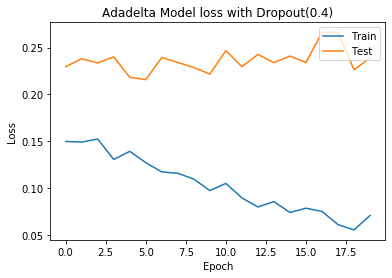

The minimum is at position 6
The minimum test loss value is 0.21582579262554646


In [20]:
np.random.seed(1)
tf.random.set_seed(2)
model = Sequential()
model.reset_states()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4)) # add dropout
model.add(Dense(10, activation='softmax'))
optimizer = Adadelta(learning_rate=0.6, rho=0.85) # hyper-paramaters from above
model.compile(loss='categorical_crossentropy', optimizer=optimizer)
model.fit(X_train, y_oh_train, batch_size=32, epochs=20, verbose=0, validation_data=(X_test, y_oh_test))

history_final = model.fit(X_train, y_oh_train, batch_size=32,
                      epochs=20, verbose=0, validation_data=(X_test, y_oh_test))
plt.plot(history_final.history['loss'])
plt.plot(history_final.history['val_loss'])
plt.title('Adadelta Model loss with Dropout(0.4)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

print("The minimum is at position", history_final.history['val_loss'].index(min(history_final.history['val_loss']))+1)
print("The minimum test loss value is", min(history_final.history['val_loss']))